<h2 style="text-align:center;">Exploring Dataset</h2>

<h2>🔃Loading Datasets</h2>

In [21]:
import os
import sys

# Detect project root by going up until we find the 'src' directory
current_dir = os.getcwd()
while not os.path.isdir(os.path.join(current_dir, 'src')):
    current_dir = os.path.dirname(current_dir)
    if current_dir == os.path.dirname(current_dir):  # Reached filesystem root
        raise FileNotFoundError("Could not find 'src' directory in any parent folders.")

# Set project root and add it to sys.path
PROJECT_ROOT = current_dir
print(f"Setting project root: {PROJECT_ROOT}")
os.chdir(PROJECT_ROOT)
sys.path.insert(0, PROJECT_ROOT)


from src.data import loader, preprocessor
from src.visualization import exploration_visualized


Setting project root: c:\Users\Electronica Care\Downloads\Healthcare_test_results_classification


In [22]:
  # Make sure loader.py is in your project directory

project_root = r'c:\Users\Electronica Care\Downloads\Healthcare_test_results_classification'  # Replace with the actual path
data_path = os.path.join(project_root, 'data', 'raw')

train_df, test_df = loader.load_data(
    train_path=os.path.join(data_path, 'train data.csv'),
    test_path=os.path.join(data_path, 'test data.csv')
)

train_df.head()


ID           Name  Age  Gender Blood Type Medical Condition  \
0   1  Bobby JacksOn   27  Female         O-            Asthma   
1   2   LesLie TErRy   68  Female         O-            Cancer   
2   3    DaNnY sMitH   21  Female         A+      Hypertension   
3   4   andrEw waTtS   91    Male        AB-          Diabetes   
4   5  adrIENNE bEll   52  Female         A+          Diabetes   

  Date of Admission            Doctor         Hospital Insurance Provider  \
0        06/06/2022  Mark Hartman Jr.  Sons and Miller              Cigna   
1        19/11/2021  Angela Contreras      White-White              Cigna   
2        05/03/2022        David Ruiz  Group Middleton           Medicare   
3        06/04/2020    Jenny Griffith  Morris-Arellano         Blue Cross   
4        31/12/2022     Cynthia Scott   Williams-Davis         Blue Cross   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     2625.980554          379       Elective     18/08/2022    Ibuprofen   
1     1471.387317          113       Elective     20/11/2021    Ibuprofen   
2     5131.488104          154      Emergency     16/05/2022  Paracetamol   
3     8972.793157          293         Urgent     26/04/2020    Ibuprofen   
4     2015.522684          265      Emergency     11/02/2023   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

<h2>🔍Data Overview</h2>

In [23]:
overview=data_overview=loader.get_data_overview(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  int64  
 3   Gender              50000 non-null  object 
 4   Blood Type          46935 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              49196 non-null  object 
 8   Hospital            49041 non-null  object 
 9   Insurance Provider  49707 non-null  object 
 10  Billing Amount      49276 non-null  float64
 11  Room Number         50000 non-null  int64  
 12  Admission Type      49819 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

<h2>Feature Types</h2>

In [24]:
categorical_cols, numerical_cols = loader.classify_features(train_df, target_col="Test Results")



🔸 Found 11 categorical features (excluding target 'Test Results'):
['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication']

🔹 Found 4 numerical features:
['ID', 'Age', 'Billing Amount', 'Room Number']


<h2>📊Checking For Missing Values</h2>

In [25]:
missing_values=preprocessor.analyze_missing_values(train_df)
print(missing_values)
exploration_visualized.analyze_and_plot_missing_values(train_df)


                    Missing Values  Missing Percentage (%)
Blood Type                    3065                   6.130
Hospital                       959                   1.918
Doctor                         804                   1.608
Billing Amount                 724                   1.448
Insurance Provider             293                   0.586
Admission Type                 181                   0.362


<h2>📊Checking For Outliers</h2>

In [26]:

outliers, summary = preprocessor.detect_outliers(train_df, method='iqr', return_summary=True)
print(summary)
outliers


{'ID': np.int64(0), 'Age': np.int64(0), 'Billing Amount': np.int64(0), 'Room Number': np.int64(0)}


ID    Age  Billing Amount  Room Number
0      False  False           False        False
1      False  False           False        False
2      False  False           False        False
3      False  False           False        False
4      False  False           False        False
...      ...    ...             ...          ...
49995  False  False           False        False
49996  False  False           False        False
49997  False  False           False        False
49998  False  False           False        False
49999  False  False           False        False

[50000 rows x 4 columns]

In [27]:
exploration_visualized.plot_outliers_all(train_df)

❌ No outliers found in any numeric column.


<h2>📊Data Distribution Analysis</h2>

In [32]:
exploration_visualized.plot_distribution_analysis(train_df)

<h2>📊Visualizing categorical features realtions with target</h2>

In [29]:
cat_cols = preprocessor.get_plotable_categorical_features(train_df, target_col="Test Results")
figs = exploration_visualized.plot_categorical_by_target(train_df, cat_cols, target_col="Test Results")

for fig in figs:
    fig.show()


<h2>Visualize Scaled Feature Distributions</h2>

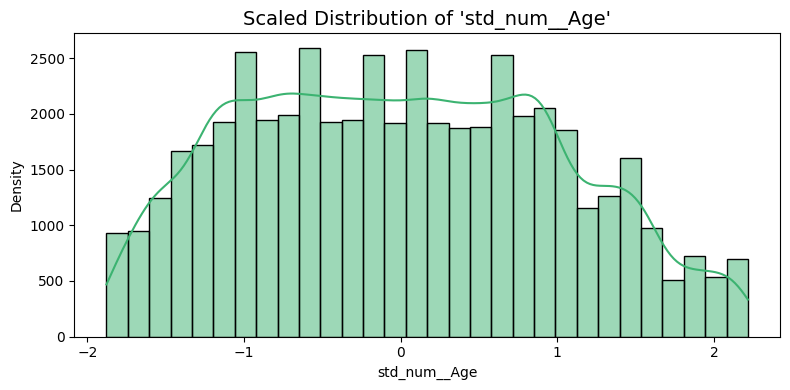

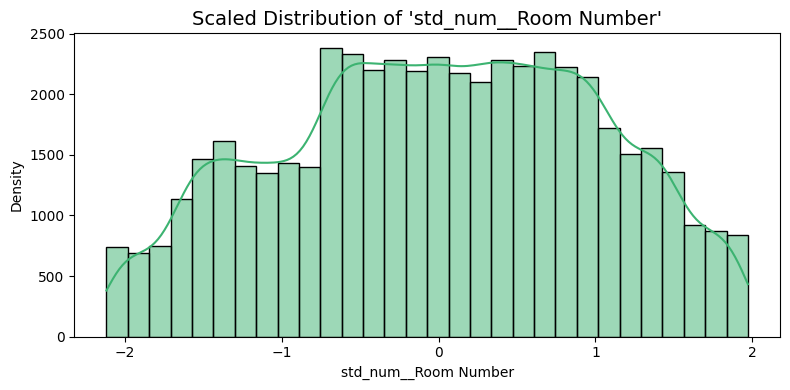

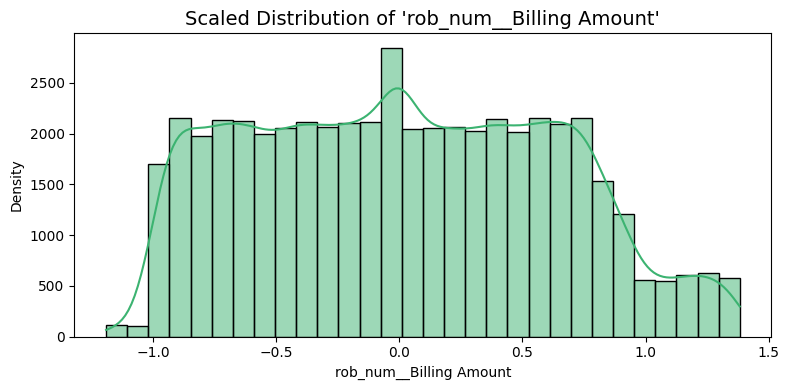

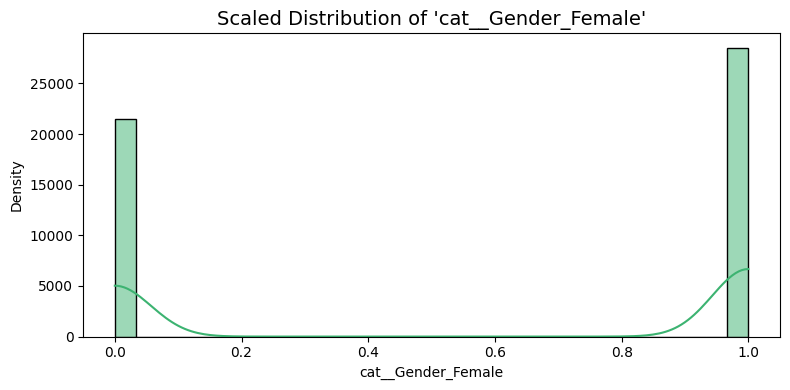

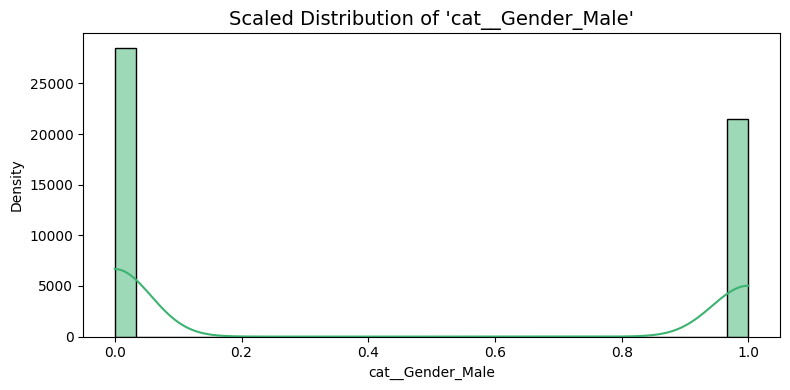

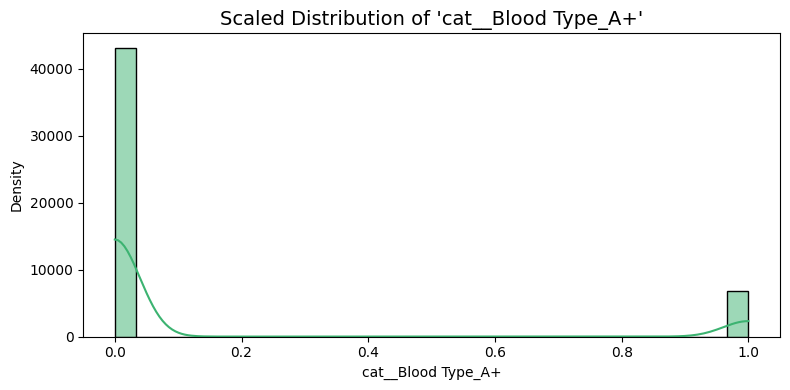

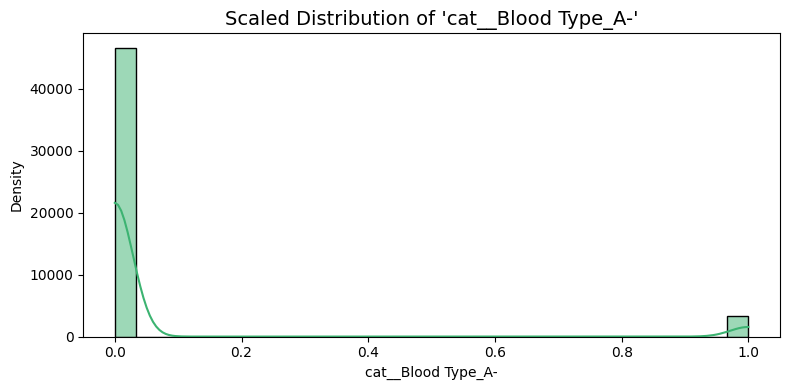

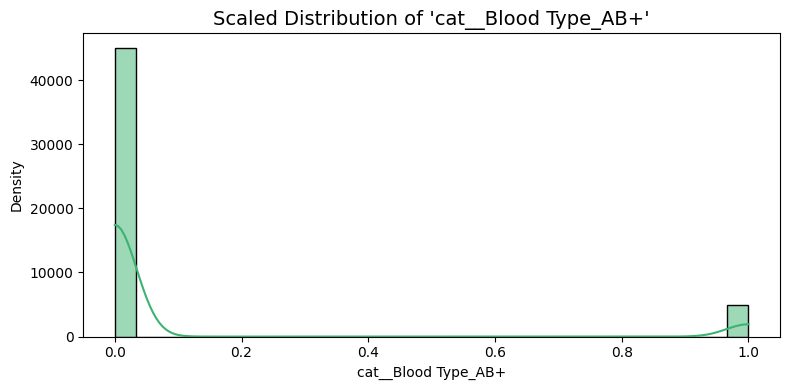

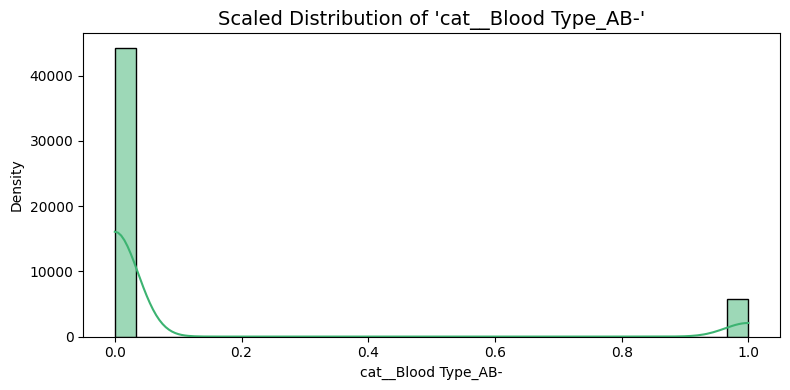

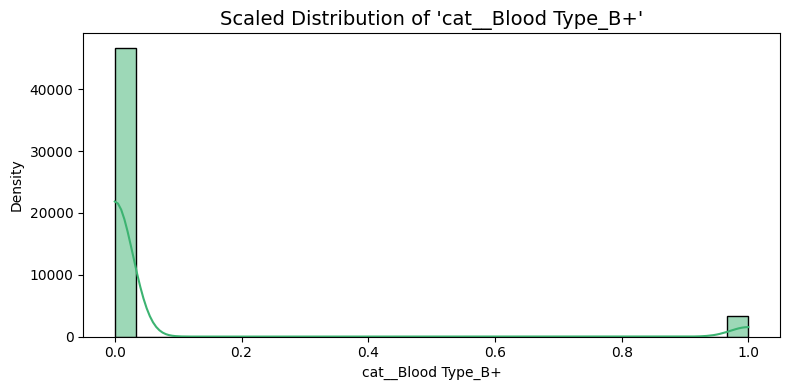

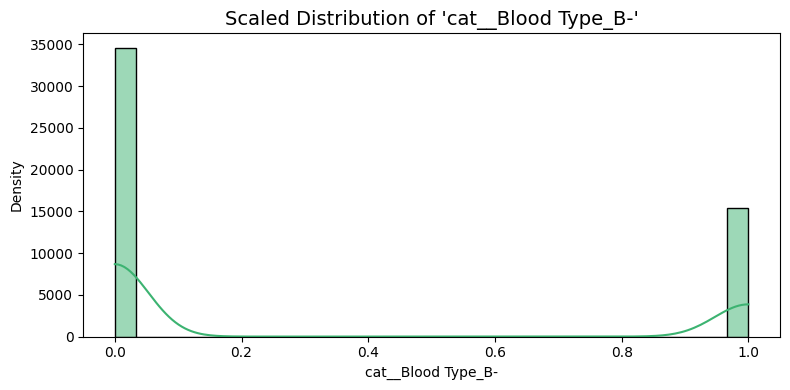

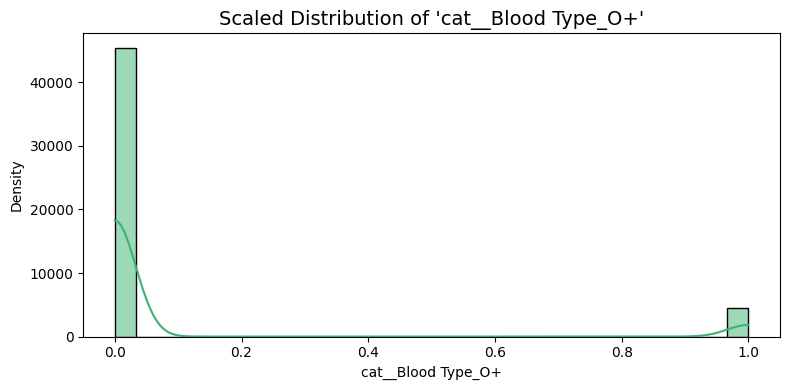

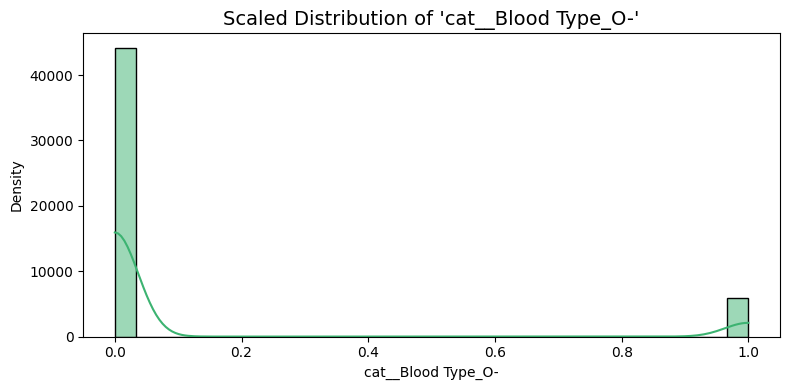

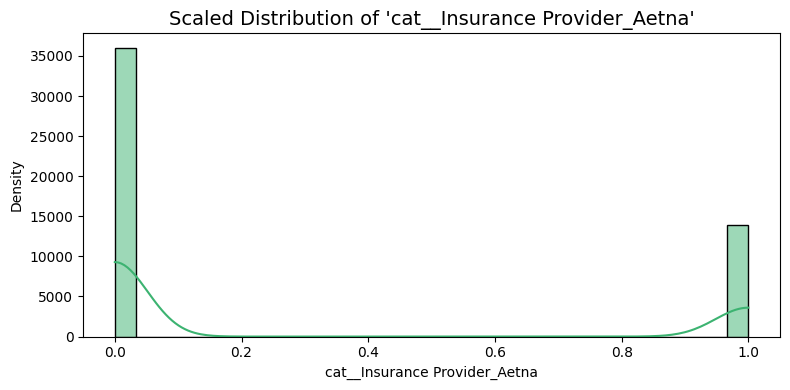

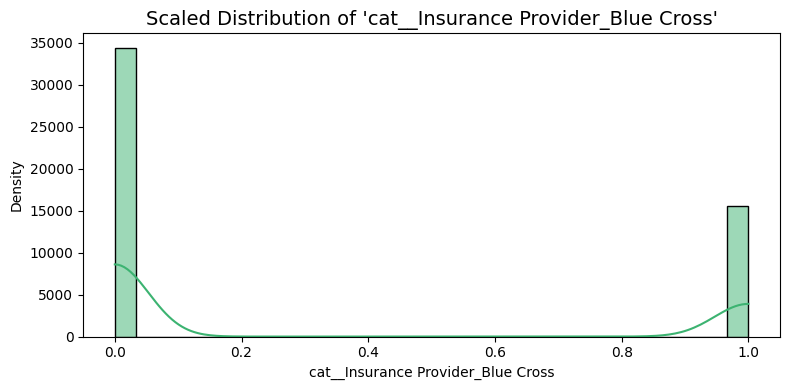

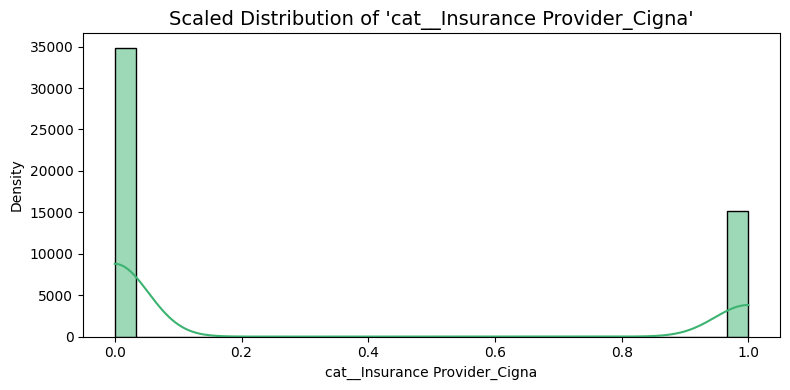

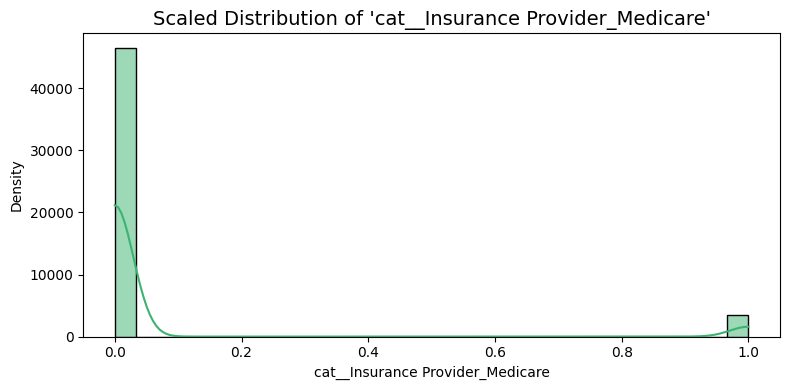

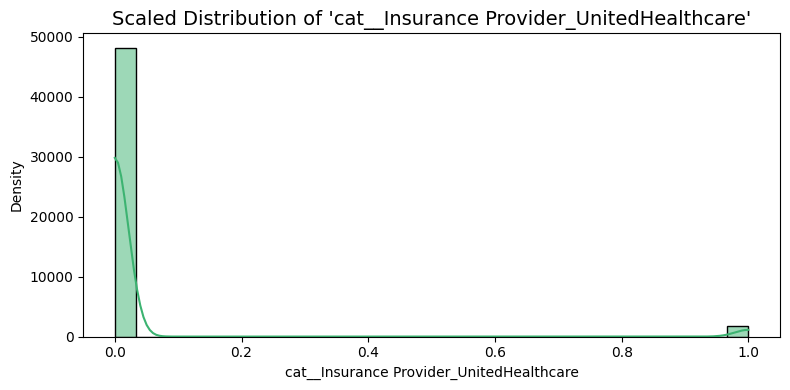

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Use absolute path from project root
file_path = "data/processed/processed_scaled_data.csv"
save_path = "reports/scaled_feature_plots"

# ✅ Load dataset
scaled_df = pd.read_csv(file_path)

# 🎯 Drop target column if it exists
if 'target' in scaled_df.columns:
    scaled_features = scaled_df.drop(columns=['target'])
else:
    scaled_features = scaled_df.copy()

# 📂 Create output folder if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# 🔁 Plot and save each feature
for col in scaled_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(scaled_features[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f"Scaled Distribution of '{col}'", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(f"{save_path}/{col}_scaled_dist.png")
    plt.show()


<h2>📈Monthly Test Results Trend</h2>

In [ ]:
# Get the grouped data first
monthly_data = preprocessor.get_monthly_test_result_counts(train_df)

# Generate the plot
fig = exploration_visualized.plot_monthly_test_result_trends(monthly_data)

# Show the figure
fig.show()


<h2>Statistical Analysis</h2>

<h2>🔎Descriptive Statistics</h2>

In [ ]:
preprocessor.compute_descriptive_statistics(train_df)

ID        Name           Age  Gender Blood Type  \
count   50000.000000       50000  50000.000000   50000      46935   
unique           NaN       49992           NaN       2          8   
top              NaN  TInA white           NaN  Female         B-   
freq             NaN           2           NaN   28514      12338   
mean    25000.500000         NaN     45.863700     NaN        NaN   
std     14433.901067         NaN     24.416119     NaN        NaN   
min         1.000000         NaN      0.000000     NaN        NaN   
25%     12500.750000         NaN     26.000000     NaN        NaN   
50%     25000.500000         NaN     45.000000     NaN        NaN   
75%     37500.250000         NaN     65.000000     NaN        NaN   
max     50000.000000         NaN    100.000000     NaN        NaN   

       Medical Condition Date of Admission            Doctor     Hospital  \
count              50000             50000             49196        49041   
unique                 6              2101               217           60   
top               Asthma        31/03/2024  Angela Contreras  Houston PLC   
freq               11485                41               585         2164   
mean                 NaN               NaN               NaN          NaN   
std                  NaN               NaN               NaN          NaN   
min                  NaN               NaN               NaN          NaN   
25%                  NaN               NaN               NaN          NaN   
50%                  NaN               NaN               NaN          NaN   
75%                  NaN               NaN               NaN          NaN   
max                  NaN               NaN               NaN          NaN   

       Insurance Provider  Billing Amount   Room Number Admission Type  \
count               49707    49276.000000  50000.000000          49819   
unique                  5             NaN           NaN              3   
top            Blue Cross             NaN           NaN         Urgent   
freq                15295             NaN           NaN          25117   
mean                  NaN     5397.314987    282.999980            NaN   
std                   NaN     3240.601901    109.993534            NaN   
min                   NaN     -995.211704     50.000000            NaN   
25%                   NaN     2645.811489    203.000000            NaN   
50%                   NaN     5313.507889    286.000000            NaN   
75%                   NaN     8027.205893    370.000000            NaN   
max                   NaN    12635.764460    500.000000            NaN   

       Discharge Date  Medication Test Results    Month  
count           50000       50000        50000    19727  
unique           2190           5            3       72  
top        09/08/2019  Penicillin     Abnormal  2021-02  
freq               41       12258        16772      324  
mean              NaN         NaN          NaN      NaN  
std               NaN         NaN          NaN      NaN  
min               NaN         NaN          NaN      NaN  
25%               NaN         NaN          NaN      NaN  
50%               NaN         NaN          NaN      NaN  
75%               NaN         NaN          NaN      NaN  
max               NaN         NaN          NaN      NaN

<h2>📊Visualizing the Test Results Distribution</h2>

In [ ]:

exploration_visualized.plot_test_result_distribution(train_df, target_col="Test Results")

<h2>📊Correlation Matrix</h2>

In [ ]:
numerical_cols=preprocessor.get_numerical_features(train_df)
exploration_visualized.plot_correlation_matrix(train_df,numerical_cols)